# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url= f"http://api.openweathermap.org/data/2.5/weather?"

lat=[]
long=[]
city_name= []
max_temp= []
humidity= []
cloud= []
wind_speed=[]
country= []
date= []
city= "Mumbai"
c_url= f"{url}appid={weather_api_key}&units=imperical&q={city}"
response= requests.get(c_url).json()
# lat.append(response['coord']['lat'])
# long.append(response['coord']['lat'])
#  city_name.appned(response['name'])
#         max_temp.append(response['main']['temp_max'])
#         cloud.appned(response['clouds']['all'])
#         wind_speed.append(response['wind']['speed'])
#         country.append(response['sys']['country'])
#         date.append(response['dt'])
#         print(f"Processing Record {count} of Set 1 | {city_name}")

pprint(response)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 19.01, 'lon': 72.85},
 'dt': 1587442120,
 'id': 1275339,
 'main': {'feels_like': 308.58,
          'humidity': 59,
          'pressure': 1011,
          'temp': 304.66,
          'temp_max': 305.15,
          'temp_min': 304.15},
 'name': 'Mumbai',
 'sys': {'country': 'IN',
         'id': 9052,
         'sunrise': 1587430005,
         'sunset': 1587475644,
         'type': 1},
 'timezone': 19800,
 'visibility': 3000,
 'weather': [{'description': 'haze', 'icon': '50d', 'id': 721, 'main': 'Haze'}],
 'wind': {'speed': 1.5}}


In [44]:
url= f"http://api.openweathermap.org/data/2.5/weather?"
city_url= f"{url}appid={weather_api_key}&units=Imperial&q="
lat=[]
long=[]
city_name= []
max_temp= []
humidity= []
cloud= []
wind_speed=[]
country= []
date= []
number= 1

print('Starting Data Retrieval')
print('___________________________')

for city in cities:
    try:
        response= requests.get(f"{city_url}{city}").json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        city_name.append(response['name'])
        max_temp.append(response['main']['temp_max'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        print(f"Processing Record {number} of Set 1 | {city}")
        number = number + 1
        
    except:
        print("City not found, next .....")

print("__________________________")
print("Data Retrieval Completed")
print("__________________________")

Starting Data Retrieval
___________________________
Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | lebork
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | atuona
City not found, next .....
Processing Record 6 of Set 1 | port-cartier
Processing Record 7 of Set 1 | providencia
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | ulladulla
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | saint-joseph
Processing Record 12 of Set 1 | jalu
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | dicabisagan
Processing Record 16 of Set 1 | poya
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | yellowknife
Processing Record 2

Processing Record 186 of Set 1 | tessalit
Processing Record 187 of Set 1 | nuuk
Processing Record 188 of Set 1 | borovoy
Processing Record 189 of Set 1 | port blair
Processing Record 190 of Set 1 | faya
Processing Record 191 of Set 1 | kaitangata
Processing Record 192 of Set 1 | sterling
Processing Record 193 of Set 1 | hofn
Processing Record 194 of Set 1 | new norfolk
Processing Record 195 of Set 1 | ponta do sol
Processing Record 196 of Set 1 | east london
Processing Record 197 of Set 1 | daitari
Processing Record 198 of Set 1 | port hardy
Processing Record 199 of Set 1 | ribeira grande
Processing Record 200 of Set 1 | maues
Processing Record 201 of Set 1 | zhezkazgan
Processing Record 202 of Set 1 | rafai
Processing Record 203 of Set 1 | chegdomyn
Processing Record 204 of Set 1 | hualmay
Processing Record 205 of Set 1 | bougouni
Processing Record 206 of Set 1 | gorokhovets
Processing Record 207 of Set 1 | kota bahru
Processing Record 208 of Set 1 | abha
Processing Record 209 of Set 

Processing Record 373 of Set 1 | kisangani
Processing Record 374 of Set 1 | ngunguru
Processing Record 375 of Set 1 | fougamou
Processing Record 376 of Set 1 | aguimes
Processing Record 377 of Set 1 | loudi
Processing Record 378 of Set 1 | abu zabad
Processing Record 379 of Set 1 | mortka
Processing Record 380 of Set 1 | university place
Processing Record 381 of Set 1 | solnechnyy
Processing Record 382 of Set 1 | iquitos
Processing Record 383 of Set 1 | gualeguaychu
Processing Record 384 of Set 1 | eyl
Processing Record 385 of Set 1 | asau
Processing Record 386 of Set 1 | kahului
City not found, next .....
Processing Record 387 of Set 1 | yerbogachen
Processing Record 388 of Set 1 | yulara
Processing Record 389 of Set 1 | deputatskiy
Processing Record 390 of Set 1 | waterloo
Processing Record 391 of Set 1 | harwich
Processing Record 392 of Set 1 | mehamn
Processing Record 393 of Set 1 | solihull
Processing Record 394 of Set 1 | lufkin
City not found, next .....
City not found, next ...

Processing Record 556 of Set 1 | union
Processing Record 557 of Set 1 | nouakchott
Processing Record 558 of Set 1 | nizhniy odes
Processing Record 559 of Set 1 | shubarshi
Processing Record 560 of Set 1 | san lawrenz
Processing Record 561 of Set 1 | ishigaki
Processing Record 562 of Set 1 | lashio
Processing Record 563 of Set 1 | akonolinga
Processing Record 564 of Set 1 | carbonia
__________________________
Data Retrieval Completed
__________________________


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
city_df= pd.DataFrame({
    "City": city_name,
    "Country": country,
    "Date":date,
    "Latitude": lat,
    "Longitude":long,
    "Maximum Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind_speed
})

city_df.head(10)

,City,Country,Date,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed
0,Faanui,PF,1587445574,-16.48,-151.75,81.73,79,99,17.02
1,Lębork,PL,1587445574,54.54,17.75,42.01,70,1,5.84
2,Hithadhoo,MV,1587445485,-0.60,73.08,85.03,69,100,5.73
3,Ushuaia,AR,1587445551,-54.80,-68.30,42.80,75,40,38.03
4,Atuona,PF,1587445575,-9.80,-139.03,81.79,74,24,13.33
5,Port-Cartier,CA,1587445575,50.03,-66.87,25.00,41,5,9.17
6,La Providencia,MX,1587445575,28.72,-111.58,73.99,40,97,1.99
7,Port Elizabeth,ZA,1587445495,-33.92,25.57,59.00,87,59,6.93
8,Ulladulla,AU,1587445576,-35.35,150.47,77.00,38,0,8.05
9,Upernavik,GL,1587445576,72.79,-56.15,25.66,87,99,9.80


In [69]:
city_df.to_csv("Cities_output.csv", index= False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [47]:
try:
    city_df= city_df.drop(city_df['Humidity']>100)
except:
    print("Skip the this step, no cities have humidity > 100%")

Skip the this step, no cities have humidity > 100%


In [48]:
#  Get the indices of cities that have humidity over 100%.


In [49]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [50]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

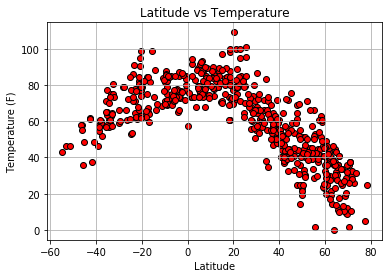

In [59]:
plt.scatter(city_df['Latitude'], city_df["Maximum Temperature"], color= 'red',edgecolor = 'black')
plt.grid()
plt.title("Latitude vs Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.savefig('images/LatvsTemp.png')

## Latitude vs. Humidity Plot

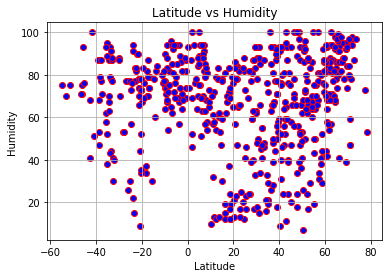

In [67]:
plt.scatter(city_df['Latitude'], city_df["Humidity"], color= 'blue',edgecolor = 'red')
plt.grid()
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("images/LatvsHumidity.png")

## Latitude vs. Cloudiness Plot

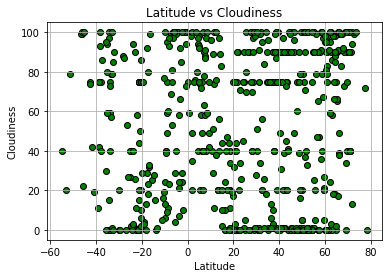

In [63]:
plt.scatter(city_df['Latitude'], city_df["Cloudiness"], color= 'green',edgecolor = 'black')
plt.grid()
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("images/LatvsCloudiness.png")

## Latitude vs. Wind Speed Plot

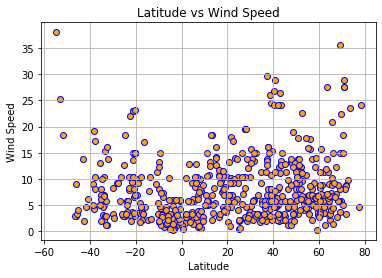

In [68]:
plt.scatter(city_df['Latitude'], city_df["Wind Speed"], color= 'orange',edgecolor = 'blue')
plt.grid()
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("images/LatvsWind.png")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression